In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Unzip dataset.zip into drive CNN folder
!unzip '/content/drive/MyDrive/Copy of Food Classification dataset.zip' -d '/content/drive/MyDrive/CNN'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/CNN/idli/277.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/278.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/280.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/282.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/283.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/284.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/285.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/286.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/287.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/288.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/290.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/292.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/293.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/295.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/296.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/297.jpg  
  inflating: /content/drive/MyDrive/CNN/idli/299.jpg  
  inflating: /

In [3]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [48]:
# Set the path to your main CNN folder
source_folder = '/content/drive/MyDrive/CNN'
train_folder = os.path.join(source_folder, 'train')
test_folder = os.path.join(source_folder, 'test')

from sklearn.model_selection import train_test_split

for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)

    if os.path.isdir(subfolder_path) and subfolder not in ['train', 'test']:
        images = os.listdir(subfolder_path)
        train_images, test_images = train_test_split(images, train_size=0.8, random_state=42)

        os.makedirs(os.path.join(train_folder, subfolder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, subfolder), exist_ok=True)

        for image in train_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(train_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

        for image in test_images:
            src_path = os.path.join(subfolder_path, image)
            dst_path = os.path.join(test_folder, subfolder, image)
            shutil.copy(src_path, dst_path)

print("Data has been split into training and test folders.")

Data has been split into training and test folders.


IMPORTING PACKAGES

In [86]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

INITITALISING CNN

In [55]:
# Creating Convolutional Base
model = Sequential()

In [56]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [57]:
model.add(Flatten())

In [69]:
model.add(Dense(1024 , activation = 'relu'))
model.add(Dense(34, activation = 'softmax'))

In [70]:
# Complile CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 34)                  │          34,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,687,106 (10.25 MB)

 Trainable params: 2,687,106 (10.25 MB)

 Non-trainable params: 0 (0.00 B)

GENERATING AUGMENTED DATA

In [72]:
# Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.3,
    horizontal_flip = True,
    zoom_range = 0.3
)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [73]:
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
    directory = train_folder,
    target_size= (64, 64),
    batch_size = 32,
    class_mode= 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory = test_folder,
    target_size= (64, 64),
    batch_size = 32,
    class_mode= 'categorical'
)

Found 19092 images belonging to 34 classes.
Found 4781 images belonging to 34 classes.


In [74]:
train_generator.class_indices

{'Baked Potato': 0,
 'Crispy Chicken': 1,
 'Donut': 2,
 'Fries': 3,
 'Hot Dog': 4,
 'Sandwich': 5,
 'Taco': 6,
 'Taquito': 7,
 'apple_pie': 8,
 'burger': 9,
 'butter_naan': 10,
 'chai': 11,
 'chapati': 12,
 'cheesecake': 13,
 'chicken_curry': 14,
 'chole_bhature': 15,
 'dal_makhani': 16,
 'dhokla': 17,
 'fried_rice': 18,
 'ice_cream': 19,
 'idli': 20,
 'jalebi': 21,
 'kaathi_rolls': 22,
 'kadai_paneer': 23,
 'kulfi': 24,
 'masala_dosa': 25,
 'momos': 26,
 'omelette': 27,
 'paani_puri': 28,
 'pakode': 29,
 'pav_bhaji': 30,
 'pizza': 31,
 'samosa': 32,
 'sushi': 33}

In [75]:
output = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 83/597 ━━━━━━━━━━━━━━━━━━━━ 4:40 546ms/step - accuracy: 0.0592 - loss: 3.3947

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


597/597 ━━━━━━━━━━━━━━━━━━━━ 434s 718ms/step - accuracy: 0.0659 - loss: 3.3033 - val_accuracy: 0.0648 - val_loss: 3.2708
Epoch 2/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 424s 689ms/step - accuracy: 0.0643 - loss: 3.2719 - val_accuracy: 0.0627 - val_loss: 3.2688
Epoch 3/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 403s 624ms/step - accuracy: 0.0607 - loss: 3.2691 - val_accuracy: 0.0648 - val_loss: 3.2667
Epoch 4/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 372s 620ms/step - accuracy: 0.0592 - loss: 3.2662 - val_accuracy: 0.0627 - val_loss: 3.2675
Epoch 5/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 359s 598ms/step - accuracy: 0.0641 - loss: 3.2676 - val_accuracy: 0.0627 - val_loss: 3.2667
Epoch 6/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 376s 587ms/step - accuracy: 0.0638 - loss: 3.2640 - val_accuracy: 0.0648 - val_loss: 3.2664
Epoch 7/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 362s 601ms/step - accuracy: 0.0637 - loss: 3.2755 - val_accuracy: 0.0627 - val_loss: 3.2665
Epoch 8/10
597/597 ━━━━━━━━━━━━━━━━━━━━ 368s 577ms/step - accuracy: 0.0636 - loss: 3.26

In [80]:
model.save('/content/drive/MyDrive/CNN/model.h5')

TESTING OUTPUT

In [89]:
def model_output(path):
    # Load and preprocess the image
    raw_img = image.load_img(path, target_size=(64, 64))  # Ensure image is loaded properly
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0

    # Predict and find the class with the highest probability
    predictions = model.predict(raw_img)
    class_index = np.argmax(predictions)
    class_name = list(train_generator.class_indices.keys())
    probability = predictions[0][class_index]

    # Display the image using OpenCV (loaded via cv2)
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))  # Convert color from BGR to RGB
    plt.axis('off')
    plt.show()

    # Print the prediction and probability
    print(f"\nPredicted Class: {class_name[class_index]}")
    print(f"Probability: {probability * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


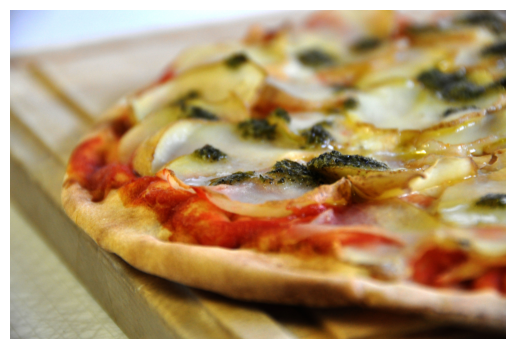


Predicted Class: Taco
Probability: 6.85%


In [101]:
model_output('/content/drive/MyDrive/CNN/pizza/011.jpg')

In [102]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.0618 - loss: 3.2543
Test Accuracy: 6.27%


FINISHED